Total Flooded Area for REFERENCE is 4020 m^2
Total Flooded Area for SUDS is 4172 m^2


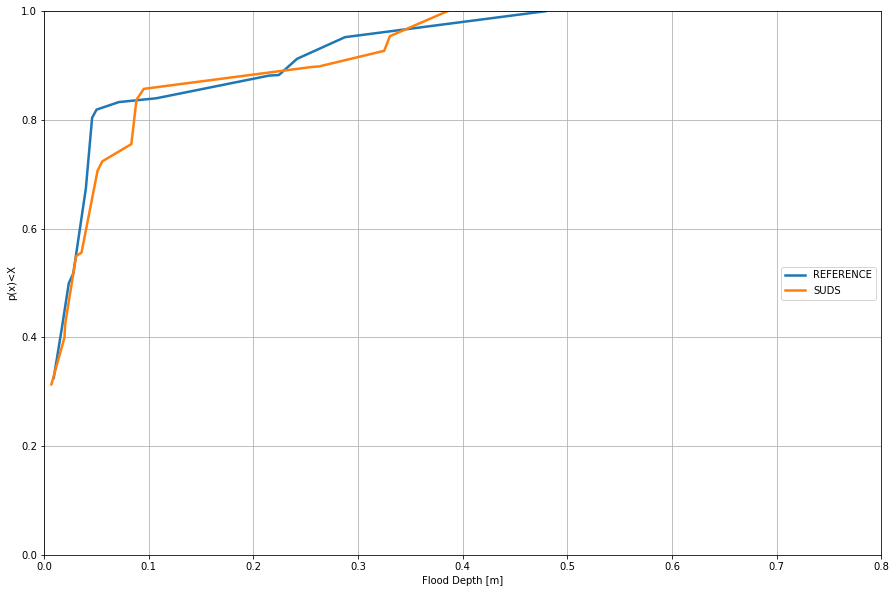

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


case=['REFERENCE', 'SUDS']
areas=[]
cell_size= 4 #based on data of the ASC files and in m^2

fig= plt.figure(figsize=[15,10])

event = '10T_30D'

for t in case:
    a=np.loadtxt('Node_flooding_'+event+'_'+t+'.asc', skiprows=6)

    unique, counts = np.unique(a, return_counts=True)
    df = pd.DataFrame(unique[1:], columns = ['Depths'])
    df['Count_pixels']=counts[1:]
    df['cumsum']=df['Count_pixels'].cumsum()/sum(df['Count_pixels'])
    df=df[df['cumsum']<0.95]# here the threshold can be changed to fit the data

    thr=df['Depths'].iloc[-1]

    new_map=a
    for i in range(0,a.shape[0]):
        for j in range(0,a.shape[1]):
            if a[i,j]>thr:
                new_map[i,j]=0
   
    np.savetxt('new_'+t+'T_120.asc', new_map, fmt='%3g')
    
    #calculate general statistics
    total_flooded_area= sum(df['Count_pixels'])*cell_size
    areas.append(total_flooded_area)
    df['cumsum_2']=df['Count_pixels'].cumsum()/sum(df['Count_pixels'])
    print('Total Flooded Area for '+ t+ ' is ' + str(total_flooded_area) +' m^2')

    plt.plot(df['Depths'], df['cumsum_2'], linewidth=2.5)
    
plt.xlabel('Flood Depth [m]')
plt.ylabel('p(x)<X')
plt.xlim([0,0.8])
plt.ylim([0,1])
plt.grid()
plt.legend(['REFERENCE', 'SUDS'], loc='center right')

font_size=18

plt.rc('font', size=font_size)          # controls default text sizes
plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
plt.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_size)    # legend fontsize
plt.savefig('ecdf_depths_'+event+'.jpeg')
# write file with areas
with open('areas'+event+'.csv', 'w') as fp:
    fp.write('Case,Area[m2]\n')
    for a in areas:
        # write each item on a new line
        fp.write(str(t)+','+str(a)+'\n')

In [38]:
df

Depths  Count_pixels    cumsum  cumsum_2
0   0.0053           327  0.335729  0.357768
1   0.0095           131  0.470226  0.501094
2   0.0096            26  0.496920  0.529540
3   0.0111           157  0.658111  0.701313
4   0.0167            90  0.750513  0.799781
5   0.0333            15  0.765914  0.816193
6   0.0357             7  0.773101  0.823851
7   0.1083            30  0.803901  0.856674
8   0.1625            40  0.844969  0.900438
9   0.2093            42  0.888090  0.946389
10  0.2146             1  0.889117  0.947484
11  0.2292            48  0.938398  1.000000